In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import acquire
import prepare

df = acquire.get_titanic_data()
df = df.drop(columns='deck')
df = df[~ df.age.isna()]
df = df[~ df.embarked.isna()]
train, validate, test = prepare.titanic_split(df)

train = train[['survived', 'class', 'sex', 'age', 'fare', 'embark_town', 'alone']]

train.head()

AttributeError: module 'prepare' has no attribute 'titanic_split'

In [ ]:
df.head()

### Explore the target
- What are we trying to predict?

In [3]:
#what would a cause of someone surviving the Titanic be??
df.survived.value_counts()

0    424
1    288
Name: survived, dtype: int64

<AxesSubplot:>

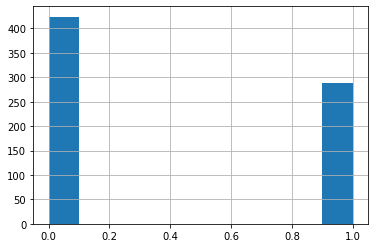

In [4]:
df.survived.hist()

In [6]:
survival_rate = df.survived.mean()